**LINEAR REGRESSION TUTORIAL BY RUVIMBO MAMBINGE**

**Abstract:** 
*The dataset contains count of public bikes rented at each hour in Seoul Bike haring System with the corresponding Weather data and Holidays information*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
np.random.seed(123)
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
link = 'https://drive.google.com/file/d/1CPx8P4n8Tu6Da2QMJzkUIEsiEm79AJXy/view?usp=sharing' # The shareable link


In [4]:
# to get the id part of the file 
id = link.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('SeoulBikeData.csv')   
  
df = pd.read_csv('SeoulBikeData.csv' , encoding='mac_roman',)
df.head()

,Date,Rented Bike Count,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.shape

(8760, 14)

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(∞C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(∞C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
df.describe(include=['O'])

,Date,Seasons,Holiday,Functioning Day
count,8760,8760,8760,8760
unique,365,4,2,2
top,27/04/2018,Spring,No Holiday,Yes
freq,24,2208,8328,8465


In [8]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(∞C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(∞C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

 **Data preparation**

In [9]:
#import preprocessing module
from sklearn.preprocessing import LabelEncoder

In [10]:
# Convert the following numerical labels from interger to float
float_array = df[[ "Hour", "Humidity(%)", "Visibility (10m)"]].values.astype(float)
   

In [11]:
# Label Encoder conversion
le = LabelEncoder()
df["Holiday"] = le.fit_transform(df["Holiday"])
df["Functioning Day"] = le.fit_transform(df["Functioning Day"])

In [12]:
#converting ObservationDate to date format
df["Date"]=pd.to_datetime(df["Date"]).dt.strftime("%d%m%Y")



In [13]:
 # One Hot Encoding conversion, creating dummy variables to convert categorical into numeric values

 Seasons = list(df.select_dtypes(include=['object']).columns)
 dummies = pd.get_dummies(df[Seasons], prefix=Seasons)
 df.drop(Seasons, axis=1, inplace = True)

 X = pd.concat([df, dummies], axis = 1)

In [14]:
df = df.astype('int')

In [15]:
#Separate training features from target
X_train = df.drop(['Rented Bike Count'], axis=1)
y_train = df['Rented Bike Count']



In [16]:
# Split train_data
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(
    X_train, y_train, test_size=0.3,random_state=0)
train_X.shape

(6132, 11)

In [17]:
#import classifier algorithm here
from sklearn.linear_model import LinearRegression

# create models
lg_model = LinearRegression()

#fitting the models
lg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# import evaluation metrics
from sklearn import metrics
# evaluate the model
lg_y_pred = lg_model.predict(test_X)

# Get Mean Absolute Error, Mean Squared Error, Root Mean Squared Error
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, lg_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, lg_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, lg_y_pred)))


Mean Absolute Error: 333.0985824600382
Mean Squared Error: 196288.63455593967
Root Mean Squared Error: 443.04473200337196


Items with a higher coeffcient have better chances of bikes being hired

In [19]:
#Calculating coefficients
from pandas import Series, DataFrame

coeff = DataFrame(X_train.columns)
coeff['Coefficient Estimate']= Series(lg_model.coef_) 
coeff

,0,Coefficient Estimate
0,Hour,26.755114
1,Temperature(∞C),32.589946
2,Humidity(%),-7.409868
3,Wind speed (m/s),7.545361
4,Visibility (10m),0.030366
5,Dew point temperature(∞C),0.075457
6,Solar Radiation (MJ/m2),-113.260724
7,Rainfall(mm),-56.468747
8,Snowfall (cm),4.310721
9,Holiday,143.737410


**MODEL EVALUATION**

In [20]:
#Calculating r-square
lg_model.score(test_X, test_y)

0.5188304545685558

**FEATURE SELECTION**

Text(0.5, 1.0, 'Residual Plot')

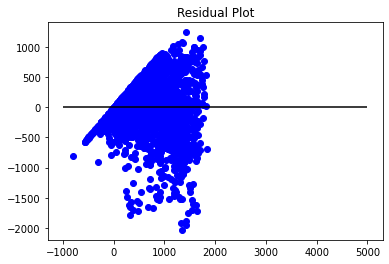

In [21]:
# residual plot

x_plot = plt.scatter(lg_y_pred,(lg_y_pred - test_y), c='b')
plt.hlines(y=0, xmin= -1000, xmax=5000)
plt.title('Residual Plot')